In [1]:
from praw import Reddit
from praw.models import Subreddit, Submission
import os
from dotenv import load_dotenv
from datetime import datetime, date, timedelta
from dotenv import dotenv_values
import datetime as dt
import pandas as pd
from datetime import datetime, date, timedelta
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import re

In [2]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords and stemmer for English
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Preprocessing function for each comment
def normalize_document(doc):
    # Remove non-alphabetic characters (keep only letters)
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, flags=re.I | re.A)
    doc = doc.lower().strip()
    
    # Tokenize the document
    tokens = word_tokenize(doc)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Apply stemming
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Rebuild the document from the processed tokens
    doc = ' '.join(tokens)
    return doc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Applying NLP on comments column

In [19]:
import nltk
nltk.download('punkt', download_dir='C:\\Users\\Dell\\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\Dell\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
nltk.download("punkt_tab")
full_df =  pd.read_csv("full_dataset_updated.csv")
full_df = full_df.dropna(subset=['comment_body'])
full_df['post_created'] = pd.to_datetime(full_df['post_created'], format='%Y-%m-%d %H:%M:%S')
full_df = full_df[full_df["comment_body"]!="[removed]"]
full_df = full_df[full_df["comment_body"]!="[deleted]"]
full_df['processed_comments'] = full_df['comment_body'].apply(normalize_document)
full_df[['comment_body', 'processed_comments']].head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,comment_body,processed_comments
0,It’s the country i live in and it’s natural fo...,countri live natur compar leader want compar u...
1,https://en.wikipedia.org/wiki/North_American_C...,httpsenwikipediaorgwikinorthamericanchargingst...
2,Very good point.,good point
3,If they can stay alive long enough. Most of th...,stay aliv long enough brand burn ton cash pole...
4,Google software 🤣\nIt won't fix the laggy sinc...,googl softwar wont fix laggi sinc gooogl cant ...


In [27]:
keywords = ["Uber", "youtube", "meta", "apple", "nvidia", "microsoft", "amazon", "Saudi Arabian Oil Co", "intel", "tesla", "MARA Holdings"]
company_dfs = {company: full_df[full_df['company'] == company] for company in full_df['company'].unique()}
for company_name in keywords:
    company_df = company_dfs.get(company_name)
    
    globals()[company_name] = company_df
    


In [28]:
globals()['microsoft'].head()

,post_title,post_score,post_id,post_num_comments,post_created,post_body,comment_id,comment_body,comment_score,company,processed_comments
168,Google in Crisis,718,1b4d5mn,533,2024-03-02 02:30:14,https://www.bigtechnology.com/p/inside-the-cri...,kt1g4fi,Clearly... \n\nWaymo actually has a fully auto...,4,microsoft,clear waymo actual fulli autonom ride share se...
169,Google in Crisis,718,1b4d5mn,533,2024-03-02 02:30:14,https://www.bigtechnology.com/p/inside-the-cri...,kszx1da,ChatGPT 4 can search the web with the paid ver...,18,microsoft,chatgpt search web paid version
170,Google in Crisis,718,1b4d5mn,533,2024-03-02 02:30:14,https://www.bigtechnology.com/p/inside-the-cri...,kt06obu,>Just remember all of ChatGPT’s data is over 2...,4,microsoft,rememb chatgpt data year old actual true reall...
171,Google in Crisis,718,1b4d5mn,533,2024-03-02 02:30:14,https://www.bigtechnology.com/p/inside-the-cri...,kszy5m0,"No it isn’t, GPT4’s latest training data is f...",17,microsoft,isnt gpts latest train data april brows web li...
172,Google in Crisis,718,1b4d5mn,533,2024-03-02 02:30:14,https://www.bigtechnology.com/p/inside-the-cri...,kt06d1j,">I've used Chat GPT sometimes, but damn it's b...",3,microsoft,ive use chat gpt sometim damn bad free paid ve...


### Using VADER (Better for Social Media)

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    scores = sia.polarity_scores(text)
    return scores['compound']  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
for company_name in keywords: 
    if company_name in globals():
        df = globals()[company_name]
        if df is None:
            print(f"{company_name} DataFrame is None.")
            continue
        df['sentiment_score'] = df['processed_comments'].apply(analyze_sentiment_vader)

        # Classify sentiment
        df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

        #df[['processed_comments', 'sentiment_score', 'sentiment']].head()
        globals()[company_name] = df

C:\Users\Dell\AppData\Local\Temp\ipykernel_28804\2906521426.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['processed_comments'].apply(analyze_sentiment_vader)
C:\Users\Dell\AppData\Local\Temp\ipykernel_28804\2906521426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
C:\Users\Dell\AppData\Local\Temp\ipykernel_28804\2906521426.py:7: SettingWithCopyWarning

Saudi Arabian Oil Co DataFrame is None.


C:\Users\Dell\AppData\Local\Temp\ipykernel_28804\2906521426.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['processed_comments'].apply(analyze_sentiment_vader)
C:\Users\Dell\AppData\Local\Temp\ipykernel_28804\2906521426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
C:\Users\Dell\AppData\Local\Temp\ipykernel_28804\2906521426.py:7: SettingWithCopyWarning

In [31]:
globals()['meta'][['processed_comments', 'sentiment_score', 'sentiment']].head()

,processed_comments,sentiment_score,sentiment
728,didnt say didnt tech compani definit counterin...,0.5574,positive
729,eu compani slight less vicious manag us busi c...,-0.6378,negative
730,thank ask plutu sound vagu,0.3612,positive
731,read post,0.0000,neutral
732,want offer subscript app store make easier use...,0.6124,positive


In [36]:
print(type(full_df))
full_df.head()

<class 'pandas.core.frame.DataFrame'>


,post_title,post_score,post_id,post_num_comments,post_created,post_body,comment_id,comment_body,comment_score,company,processed_comments
0,Tesla stands to earn billions by opening U.S. ...,548,1b3kl34,175,2024-03-01 03:45:26,"As of Thursday, owners of Ford electric vehicl...",kswcta9,It’s the country i live in and it’s natural fo...,1,tesla,countri live natur compar leader want compar u...
1,Tesla stands to earn billions by opening U.S. ...,548,1b3kl34,175,2024-03-01 03:45:26,"As of Thursday, owners of Ford electric vehicl...",ksufbu2,https://en.wikipedia.org/wiki/North_American_C...,7,tesla,httpsenwikipediaorgwikinorthamericanchargingst...
2,Tesla stands to earn billions by opening U.S. ...,548,1b3kl34,175,2024-03-01 03:45:26,"As of Thursday, owners of Ford electric vehicl...",ksv9blq,Very good point.,1,tesla,good point
3,Tesla stands to earn billions by opening U.S. ...,548,1b3kl34,175,2024-03-01 03:45:26,"As of Thursday, owners of Ford electric vehicl...",ksts85g,If they can stay alive long enough. Most of th...,6,tesla,stay aliv long enough brand burn ton cash pole...
4,Tesla stands to earn billions by opening U.S. ...,548,1b3kl34,175,2024-03-01 03:45:26,"As of Thursday, owners of Ford electric vehicl...",ksuj8j5,Google software 🤣\nIt won't fix the laggy sinc...,3,tesla,googl softwar wont fix laggi sinc gooogl cant ...


C:\Users\Dell\AppData\Local\Temp\ipykernel_28804\4023098402.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis')


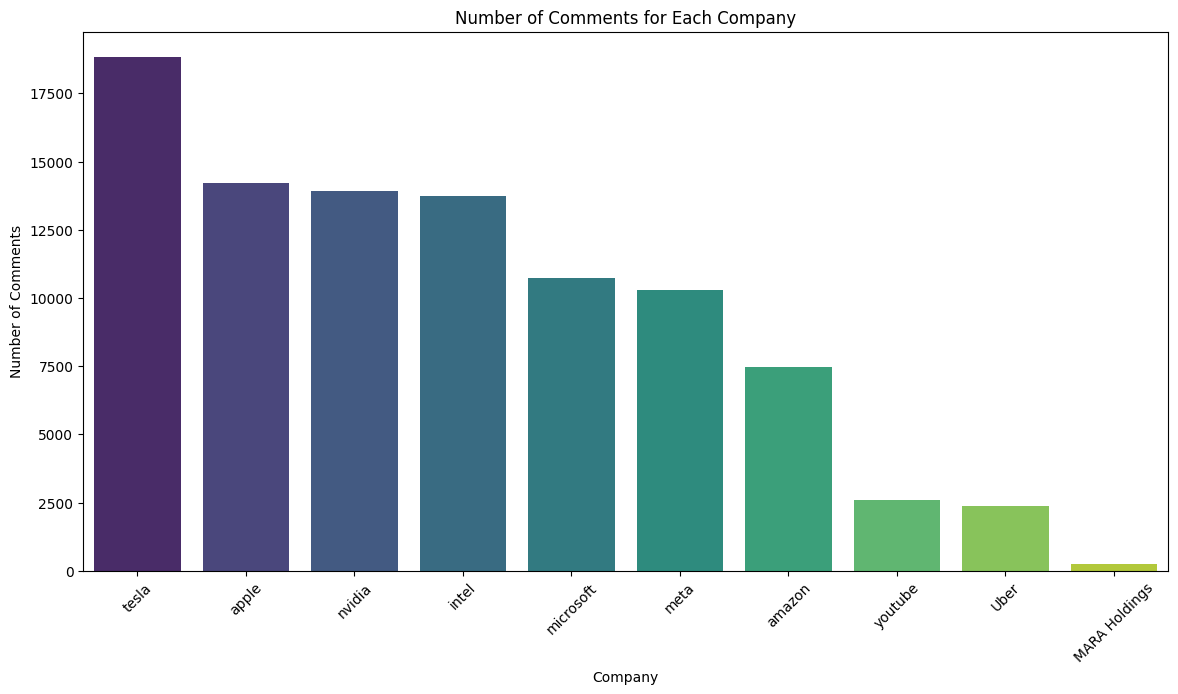

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'company' column contains a string of multiple companies per comment
# Split the companies in each comment and flatten the list
companies_list = full_df['company'].dropna().apply(lambda x: x.split(','))  # Adjust the separator if needed
all_companies = [company.strip() for sublist in companies_list for company in sublist]

# Create a new DataFrame with the counts of each company
company_counts = pd.Series(all_companies).value_counts()

# Plot the number of comments for each company
plt.figure(figsize=(14, 7))
sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Number of Comments')
plt.title('Number of Comments for Each Company')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [41]:
# Count the number of comments for each company
comment_counts = full_df['company'].value_counts()

# Get the company with the highest number of comments
top_company = comment_counts.idxmax()
top_count = comment_counts.max()

print(f"The company with the highest number of comments is {top_company} with {top_count} comments.")


The company with the highest number of comments is tesla with 15809 comments.
